# 👋 Multiclass Classification Tutorial with PyCaret 


Reza Rezazadegan   
[dreamintelligent.com](dreamintelligent.com)


In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.0.0'

# 🚀 Quick start

PyCaret’s Classification Module that we used for binary classification can be used for multi-class classification as well, i.e. when we have more than 2 classes. 

In this tutorial we make use of the **digits dataset** which contains 4x4 images of handwritten digits together with the actual number they represent. It is included in this repository. We choose this dataset because it is intuitive and easy to understand the boundaries between the classes. The first 16 columns in the file are the pixel values of each of the 16 pixels in the pictures, with values from 0-100. 

In [ ]:
# Save the CSV file in the same directory as this notebook and then we use pandas to read this file


from pandas import read_csv
data= read_csv("digits.csv", header=None) # The CSV file does not have a header
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100,5
10988,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0,4
10989,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5,5
10990,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0,1


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [11]:
setup?

Signature:
setup(
    data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    data_func: Optional[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame]]] = None,
    target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1,
    index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True,
    train_size: float = 0.7,
    test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._matrix.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    ordinal_features: Optional[Dict[str, list]] = None,
    numeric_features: Optional[List[str]] = None,
    categorical_features: Optional[List[str]] = None,
    date_features: Optional[List[str]] = None,
    text_features: Optional[List[str]] = None,
    ignore_features: Optional[List[str]] = None,
    keep_features: Optional[List[str]] = None,
    prepro

In [14]:
# import pycaret classification and init setup
from pycaret.classification import *

# We decrease the number of folds in cross validation to speed up the process
# The target of prediction is the column 16. 
s = setup(data, target = 16, session_id = 123, fold=5)

,Description,Value
0,Session id,123
1,Target,16
2,Target type,Multiclass
3,Original data shape,"(10992, 17)"
4,Transformed data shape,"(10992, 17)"
5,Transformed train set shape,"(7694, 17)"
6,Transformed test set shape,"(3298, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [15]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9931,0.9995,0.9931,0.9931,0.9931,0.9923,0.9923,0.1200
catboost,CatBoost Classifier,0.9931,0.9997,0.9931,0.9931,0.9931,0.9923,0.9923,7.0400
lightgbm,Light Gradient Boosting Machine,0.9905,0.9996,0.9905,0.9906,0.9905,0.9895,0.9895,0.7660
rf,Random Forest Classifier,0.9899,0.9996,0.9899,0.9899,0.9899,0.9887,0.9887,0.1540
knn,K Neighbors Classifier,0.9897,0.9983,0.9897,0.9898,0.9897,0.9886,0.9886,1.1080
gbc,Gradient Boosting Classifier,0.9854,0.0000,0.9854,0.9855,0.9854,0.9838,0.9838,2.9280
dt,Decision Tree Classifier,0.9552,0.9751,0.9552,0.9556,0.9552,0.9502,0.9502,0.8180
lr,Logistic Regression,0.9401,0.0000,0.9401,0.9408,0.9401,0.9334,0.9335,1.5900
svm,SVM - Linear Kernel,0.8899,0.0000,0.8899,0.9022,0.8885,0.8777,0.8793,0.0580
lda,Linear Discriminant Analysis,0.8759,0.0000,0.8759,0.8791,0.8740,0.8621,0.8629,0.0140


## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

### The confusion matrix 
It tells us how many of the samples belonging to one class are classified into other classes. For example, below we see that 8 samples belonging to class 1 are misclassified into class 2, and 3 samples of the same class are misclassified into class 3. Generally classification accuracy of this model (Extra Trees) is very good. 

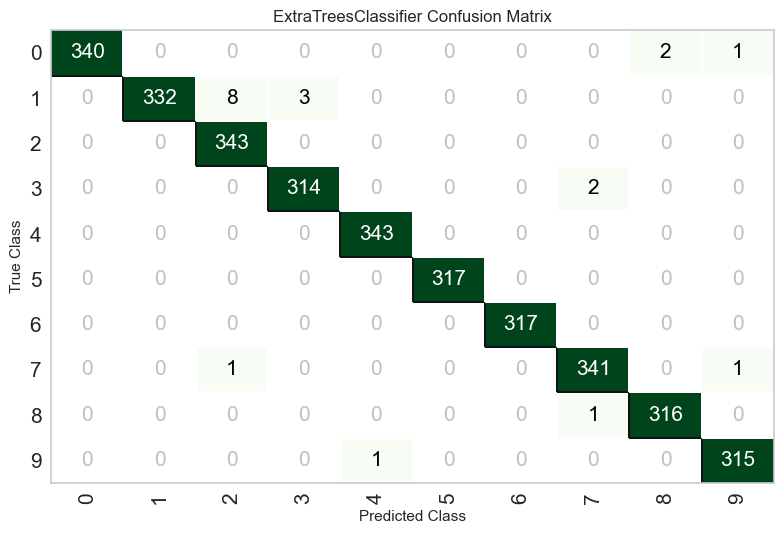

In [16]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

### Decision boundary
A lot of information about the spread, intersections and the boundaries between classes can be obtained from the decision boundary plot. 
It is obtained by reducing the dimension of data to 2. For example we can see in the plot below that the class 8 is spread and has a lot of overlap/boundary with other classes. We also see that the class 5 is split into 2 spatially separate regions. 

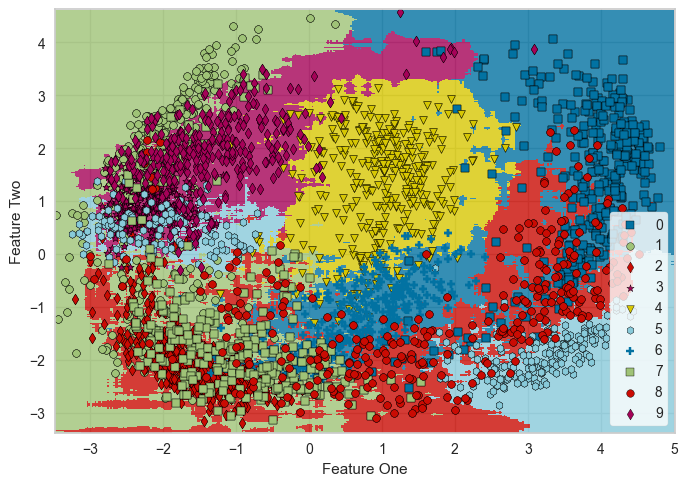

In [17]:
# plot decision boundaries
plot_model(best, plot = 'boundary')

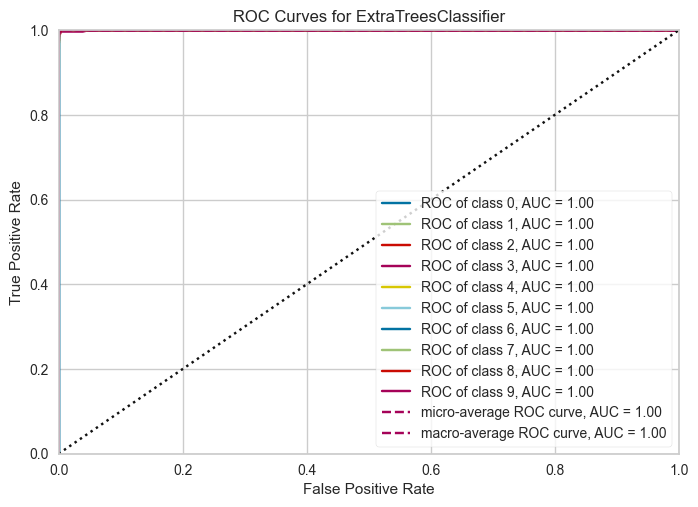

In [18]:
# plot AUC
plot_model(best, plot = 'auc')

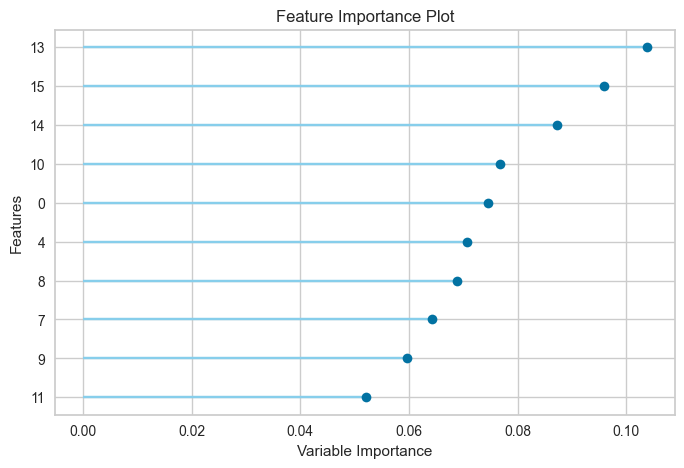

In [22]:
# plot feature importance
plot_model(best, plot = 'feature')

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [21]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [29]:
# predict on test set
predictions = predict_model(best, data=data)

In [ ]:
# show predictions df
predictions

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,prediction_label,prediction_score
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8,8,1.00
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8,8,1.00
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8,8,0.94
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9,9,1.00
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9,9,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100,5,5,1.00
10988,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0,4,4,1.00
10989,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5,5,5,1.00
10990,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0,1,1,1.00


In [55]:
misclassification=predictions[predictions["16"]!= predictions['prediction_label'] ]
misclassification

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,prediction_label,prediction_score
568,0,93,70,100,100,88,95,70,75,52,70,34,55,17,45,0,1,3,0.40
1255,33,75,69,100,90,94,79,55,55,19,0,0,34,3,100,7,1,2,0.51
1294,1,64,29,100,34,79,28,32,0,1,8,0,54,2,100,2,1,2,0.52
1640,21,57,43,100,44,79,36,30,0,2,5,3,53,1,100,0,1,2,0.67
1667,20,87,100,100,80,83,40,66,20,49,0,33,0,15,100,0,1,2,0.55
3247,18,70,49,100,47,86,36,40,4,7,0,0,50,4,100,9,1,2,0.69
3489,0,63,16,90,100,100,90,73,53,40,22,6,11,0,48,18,7,2,0.37
4020,0,62,21,100,27,80,26,35,4,4,12,0,55,2,100,5,1,2,0.54
4347,0,76,42,100,51,91,43,52,46,13,100,7,71,2,31,0,1,3,0.42
4356,0,92,42,100,90,100,100,83,71,63,57,40,44,17,14,0,3,7,0.42


[ 33.  75.  69. 100.  90.  94.  79.  55.  55.  19.   0.   0.  34.   3.
 100.   7.]


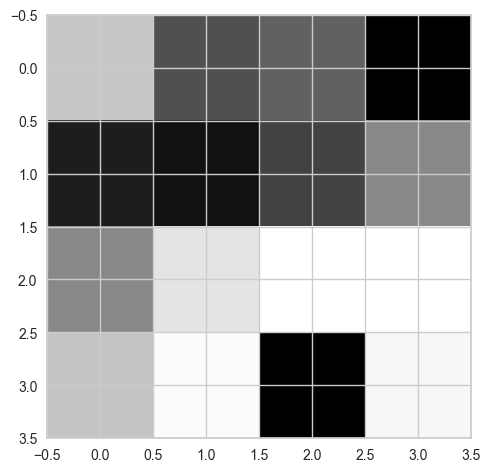

In [61]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def plot_image(index, df):
    array=np.array(df.iloc[index].values)[:16]
    print(array)
    pixels=array.reshape(4,4, order='C')
    plt.imshow(pixels) #, interpolation='nearest')
    plt.show()


plot_image(1, misclassification)

The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [16]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('species', axis=1, inplace=True)
new_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,prediction_label,prediction_score
0,5.1,3.5,1.4,0.2,Iris-setosa,0.9775
1,4.9,3.0,1.4,0.2,Iris-setosa,0.9678
2,4.7,3.2,1.3,0.2,Iris-setosa,0.9820
3,4.6,3.1,1.5,0.2,Iris-setosa,0.9719
4,5.0,3.6,1.4,0.2,Iris-setosa,0.9813


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [18]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=F...
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('trained_model',
                  LogisticRe

In [19]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer(add_indicator=F...
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)